# 14_한국어 전처리 패키지(Text Preprocessing Tools for Korean Text)
이 문서에서는 유용한 한국어 전처리 패키지를 다룬다. 앞서 소개한 형태소와 문장 토크나이징 도구들인 KoNLPy와 KSS(Korean Sentence Splitter)와 함께 유용하게 사용할 수 있는 패키지들이다. 

## 1. PyKoSpacing
PyKoSpacing은 한국어 띄어쓰기 패키지로 띄어쓰기가 되어있지 않은 문장을 띄어쓰기를 한 문장으로 변환해주는 패키지이다. PyKoSpacing은 대용량 코퍼스를 학습하여 만들어진 띄어쓰기 딥 러닝 모델로 준수한 성능을 가지고 있다.

코드 다운로드가 제대로 실행되지 않는 문제점이 존재한다. 

In [1]:
# !pip install git+https://github.com/haven-jeon/PyKoSpacing.git

## 2. Py-Hanspell
Py-Hanspell은 네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지이다.

In [2]:
# !pip install git+https://github.com/ssut/py-hanspell.git

In [3]:
from hanspell import spell_checker

sentence = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sentence)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


위의 예시에서 알 수 있듯이, 이 패키지는 띄어쓰기도 보정해준다. 다른 예제를 시험해보자. 

In [4]:
sentence2 = '김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.'
spelled_sent = spell_checker.check(sentence2)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.


## 3. SOYNLP를 이용한 단어 토큰화
soynlp는 품사 태깅, 단어 토큰화 등을 지원하는 토크나이저이다. 비지도학습으로 단어 토큰화를 한다는 특징을 갖고 있으며, 데이터에 자주 등장하는 단어들을 분석합니다. soynlp 단어 토크나이저는 내부적으로 단어 점수 표가 있고, 그 표를 기반으로 동작한다.이 점수는 응집 확률(cohension probability)과 브랜칭 엔트로피(branching entropy)를 활용한다.

In [5]:
# !pip install soynlp

### 1. 신조어 문제
soynlp를 소개하기 전에 기존의 형태소 분석기가 가진 문제는 무엇이었는지, SOYNLP가 어떤 점에서 유용한지 정리해보자. 기존의 형태소 분석기는 신조어나 형태소 분석기에 등록되지 않은 단어 같은 경우 제대로 구분하지 못하는 단점이 있었다. 

In [6]:
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs("에이비식스 이대휘 1월 최애돌 기부 요정"))

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']


에이비식스는 아이돌의 이름이고, 이대휘는 에이비식스의 멤버이며, 최애돌은 최고로 애정하는 아이돌이라는 뜻이지만 위의 형태소 분석 결과에서는 단어가 죄대 따로따로 분리되어 있는 것을 볼 수 있다.<br>

그렇다면 텍스트 데이터에서 특정 문자 시퀀스가 자주 함께 등장하는 빈도가 높고, 앞뒤로 조사 또는 완전히 다른 단어가 등장하는 것을 고려해서 해당 문자 시퀀스를 형태소라고 판단하는 단어 토크나이저라면 어떨까? <br>

예를 들어 에이비식스라는 문자열이 자주 연결되어 등장한다면 한 단어라고 판단하고, 또한 에이비식스라는 단어 앞뒤에 '최고', '가수', '실력'과 같은 독립된 다른 단어들이 계속해서 등장한다면 에이비식스를 한 단어로 파악하는 식이다. 그리고 이런 아이디어를 가진 단어 토크나이저가 soynlp이다.

### 2. 학습하기
soynlp는 기본적으로 학습에 기반한 토크나이저이므로 학습에 필요한 한국어 문서를 다운로드한다.

In [7]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [8]:
# urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

In [9]:
# 훈련 데이터를 다수의 문서로 분리
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

총 3만 91개의 문서가 존재한다. 상위 3개의 문서만 출력해보도록 하자.

In [10]:
i = 0
for document in corpus:
    if len(document) > 0:
        print(document)
        i = i + 1
    if i == 3:
        break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

정상으로 출력되는 것을 확인할 수 있다. soynlp는 학습 기반의 단어 토크나이저이므로 기존의 KoNLPy에서 제공되는 형태소 분석기들과는 달리 학습 과정을 거쳐야 한다. 이는 전체 코퍼스로부터 응집 확률과 브랜칭 엔트로피 단어 점수표를 만드는 과정이다. WordExtractor.extract()를 통해 전체 코퍼스에 대한 단어 점수표를 계산할 수 있다. 

In [11]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 1.005 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


학습이 완료되었습니다. 

### 3. SOYNLP의 응집 확률(cohension probability)
응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도이다. 응집 확률은 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그 다음 문자가 나올 확률을 계산하여 누적곱을 한 값이다. 이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높다. 수식은 아래와 같다. 
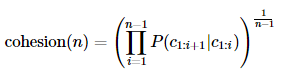
'반포한강공원에'라는 7 길이의 문자 시퀀스에 대해 각 내부 문자열의 스코어를 구하는 과정은 다음과 같다. 

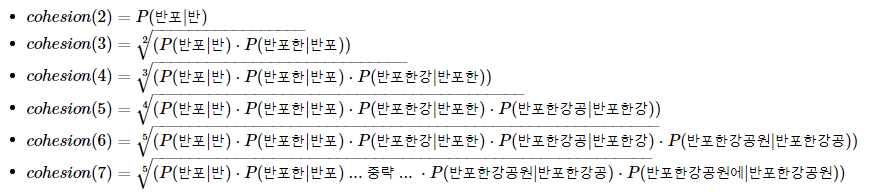
실습을 통해 직접 응집 확률을 계산해보자. '반포한'의 응집 확률을 계산한다.

In [12]:
word_score_table['반포한'].cohesion_forward

0.08838002913645132

그렇다면 '반포한강'의 응집 확률은 '반포한'의 응집 확률보다 높을까? 

In [13]:
word_score_table['반포한강'].cohesion_forward

0.19841268168224552

'반포한강'은 '반포한'보다 응집 확률이 높다. 그렇다면 '반포한강공'은 어떨까?

In [14]:
word_score_table['반포한강공'].cohesion_forward

0.2972877884078849

역시 '반포한강'보다 응집 확률이 높다. '반포한강공원'은 어떨까?

In [15]:
word_score_table['반포한강공원'].cohesion_forward

0.37891487632839754

응집 확률이 더 높아진 것을 확인할 수 있다. 여기에 조사를 붙일 경우에는 어떨까?

In [17]:
word_score_table['반포한강공원에'].cohesion_forward

0.33492963377557666

오히려 이번보다 응집 확률이 낮아지는 것을 볼 수 있다. 결국 결합도는 '반포한강공원'일 때가 가장 높았다. 응집도를 통해 하나의 단어로 판단하기에 가장 적합한 문자열은 '반포한강공원'이라고 볼 수 있다. 

## 4. SOYNLP의 브랜칭 엔트로피(branching entropy)